# Notebook summary

##### **No model in this notebook is a reliable indicator**

- Last Value (best r2 score and lowest rmse)
- LinearRegression (imitates last value)
- MLPRegressor
- Ridge
- DecisionTreeRegressor
- XGBRegressor
- RandomForestRegressor
- KNeighborsRegressor
- XGBRFRegressor
- Lasso

#### Next step : Transform data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

import warnings
warnings.filterwarnings('ignore')

In [2]:
# List of filenames containing our FOREX data
forex_tables_glob = glob("../data/*.xls")

def create_forex_df(all_files_glob=glob("../data/*.xls")):

    all_files = all_files_glob

    li = []

    for filename in all_files:
        tdf = pd.read_excel(filename, skiprows=5, na_values=['CLOSED', 'closed', 'Closed', ' --']).drop([0,1,2,3,4])
        tdf = tdf.rename(columns={'Units':'Date'})

        # Convert Date to Datetime type
        tdf['Date'] = pd.to_datetime(tdf['Date'])

        # Create time series index
        tdf = tdf.set_index('Date', drop=True)
        li.append(tdf)

    df = pd.concat(li, axis=0, sort=False)
    
    return df

data = create_forex_df(forex_tables_glob)

In [3]:
data

,USD,Index,EUR,JPY,GBP,CHF,NZD,CAD,HKD,SGD,...,GRD,INR,THB,VND,AED,PGK,ZAR,SAR,SEK,PHP
Date,,,,,,,,,,,,,,,,,,,,,
1983-12-12,0.9175,83,NaN,216.35,0.6392,NaN,1.4031,1.1442,7.1758,1.9588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-12-13,0.901,81.6,NaN,212.71,0.6308,1.9957,1.3864,1.1257,7.0458,1.9245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-12-14,0.9,81.7,NaN,212.4,0.6347,1.9951,1.3878,1.1263,7.0362,1.9217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-12-15,0.8978,81.3,NaN,211.03,0.6321,1.9823,1.3833,1.1215,7.0194,1.9154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-12-16,0.8928,80.9,NaN,209.67,0.6287,1.972,1.3763,1.1152,6.9808,1.9078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03,0.6696,58.1,0.6042,72.64,0.5086,0.6452,1.0351,0.8868,5.2002,0.9161,...,NaN,47.91,20.91,15575,2.4591,2.2814,NaN,NaN,NaN,NaN
2020-02-04,0.6719,58.2,0.6075,73.06,0.5165,0.6495,1.039,0.893,5.2194,0.921,...,NaN,47.84,20.78,15615,2.4676,2.2893,NaN,NaN,NaN,NaN
2020-02-05,0.6738,58.5,0.6106,73.77,0.5176,0.6534,1.039,0.8955,5.2324,0.9305,...,NaN,48,20.96,15648,2.4745,2.2957,NaN,NaN,NaN,NaN


In [18]:
# Data after 2017 (past 3 years)
data_3yrs = data['2017':]
df = data_3yrs[['USD']]

print("Total data count = ", df.shape[0])
print("Number of missing values = ", df.isnull().sum().sum())
print()

# Create lag 10 features
for i in range(1, 11):
    label = "lag_{}".format(i)
    df[label] = df['USD'].shift(i)
    
df = df.dropna(axis=0)

train_df = df['2017':'2018']
val_df = df['2019']
test_df = df['2020']

print("Count of dates in training data = ", train_df.shape[0])
print("Count of dates in validation data = ", val_df.shape[0])
print("Count of dates in test data = ", test_df.shape[0])

Total data count =  778
Number of missing values =  0

Count of dates in training data =  491
Count of dates in validation data =  251
Count of dates in test data =  26


In [19]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor

In [20]:
train_df.head()

,USD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,
2017-01-17,0.75,0.7476,0.7485,0.7462,0.7381,0.7374,0.731,0.7318,0.7302,0.724,0.7234
2017-01-18,0.7552,0.75,0.7476,0.7485,0.7462,0.7381,0.7374,0.731,0.7318,0.7302,0.724
2017-01-19,0.7522,0.7552,0.75,0.7476,0.7485,0.7462,0.7381,0.7374,0.731,0.7318,0.7302
2017-01-20,0.7575,0.7522,0.7552,0.75,0.7476,0.7485,0.7462,0.7381,0.7374,0.731,0.7318
2017-01-23,0.7562,0.7575,0.7522,0.7552,0.75,0.7476,0.7485,0.7462,0.7381,0.7374,0.731


In [21]:
X = train_df.drop('USD', axis=1).astype('float')
y = train_df['USD']

labels = ['LinearRegression',
          'Lasso',
          'Ridge',
          'DecisionTreeRegressor',
          'KNeighborsRegressor',
          'MLPRegressor',
          'RandomForestRegressor',
          'XGBRegressor',
          'XGBRFRegressor',
         ]

models = [LinearRegression(),
          Lasso(),
          Ridge(),
          DecisionTreeRegressor(),
          KNeighborsRegressor(),
          MLPRegressor(),
          RandomForestRegressor(),
          XGBRegressor(objective='reg:squarederror'),
          XGBRFRegressor(objective='reg:squarederror')]

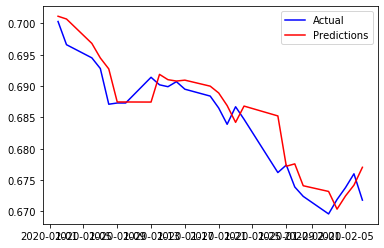

In [86]:
model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)
# plt.plot(y, color='blue')
# plt.plot(y.index, predictions, color='green')

X_val = val_df.drop('USD', axis=1)
y_val = val_df['USD']
val_pred = model.predict(X_val)
# plt.plot(y_val[-20:], color='blue')
# plt.plot(y_val[-20:].index, val_pred[-20:], color='red')

X_test = test_df.drop('USD', axis=1)
y_test = test_df['USD']
test_pred = model.predict(X_test)
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_test.index, test_pred, color='red', label='Predictions')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

In [24]:
def pred_plot(model, label):
    
    results = []
    
    model.fit(X, y)
    X_test = test_df.drop('USD', axis=1).astype('float')
    y_test = test_df['USD'].astype('float')
    test_pred = model.predict(X_test).astype('float')
#     plt.plot(y_test, color='blue', label='Actual')
#     plt.plot(y_test.index, test_pred, color='red', label='Predictions')
#     plt.title(label)
#     plt.legend()
#     plt.show()
    
    residual_diagnostics(y_test, test_pred, label)
    
    metrics = [r2_score, mean_absolute_error, mean_squared_error, median_absolute_error]
    metric_labels = ['r2_score', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error']
    
    for metric, label in zip(metrics, metric_labels):
        results.append(metric(y_test, test_pred))
        
    return results

In [25]:
import seaborn as sns
def evaluate_models(models, labels):
    
    metrics = ['r2_score',
               'mean_absolute_error',
               'mean_squared_error',
               'median_absolute_error']
    
    res = pd.DataFrame(index=labels, columns=metrics)

    for model, label in zip(models, labels):
        eval_metrics = pred_plot(model, label)
        res.at[label,:] = eval_metrics
        
    return res

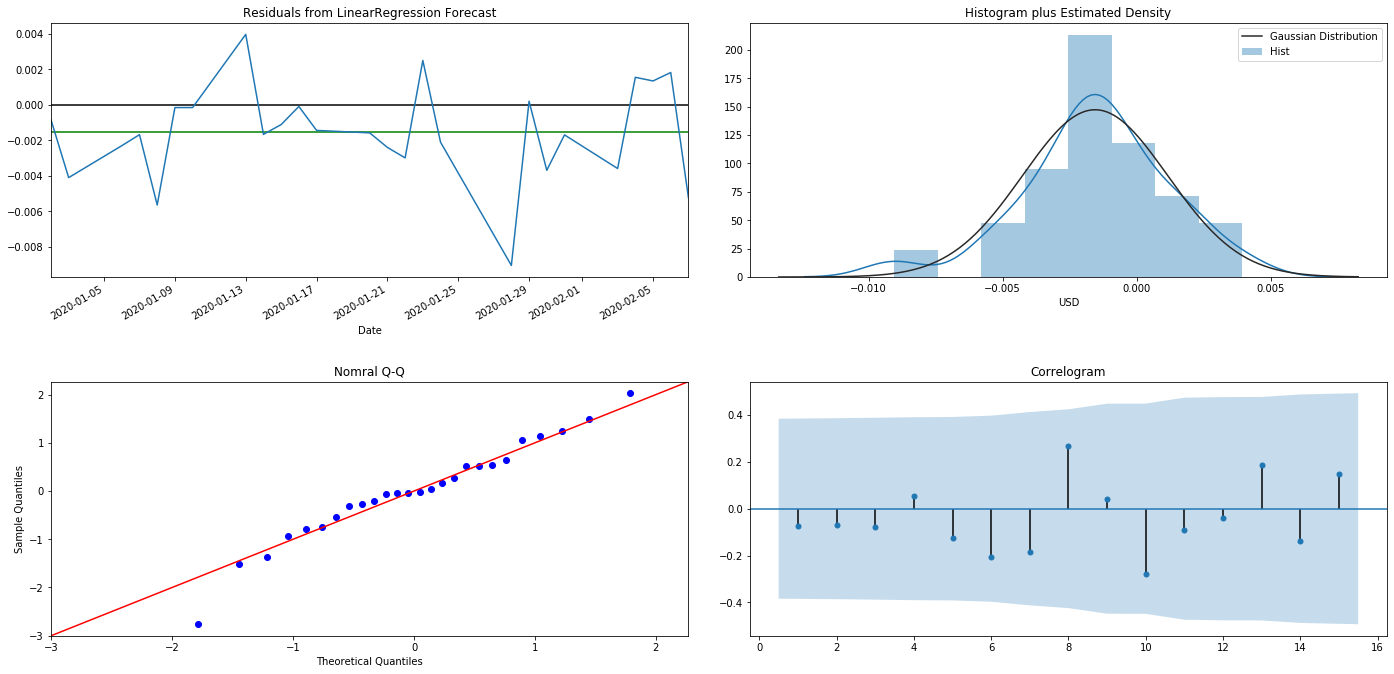

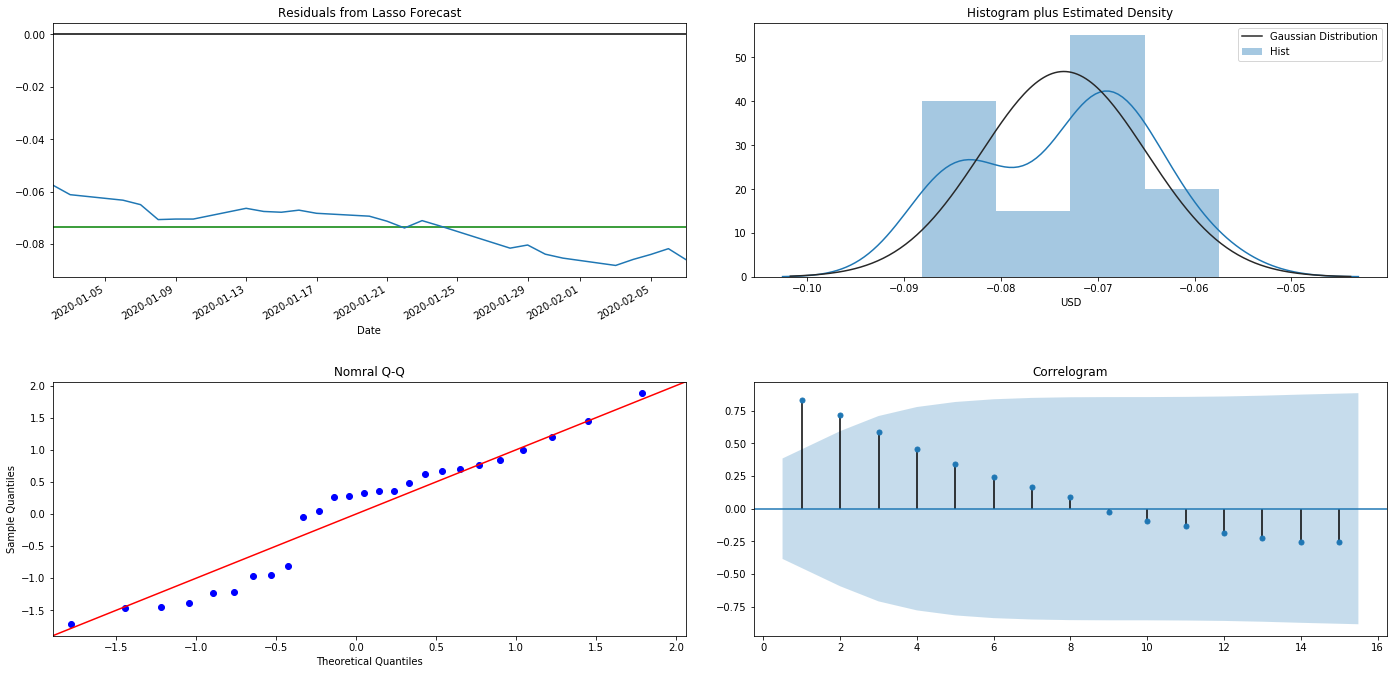

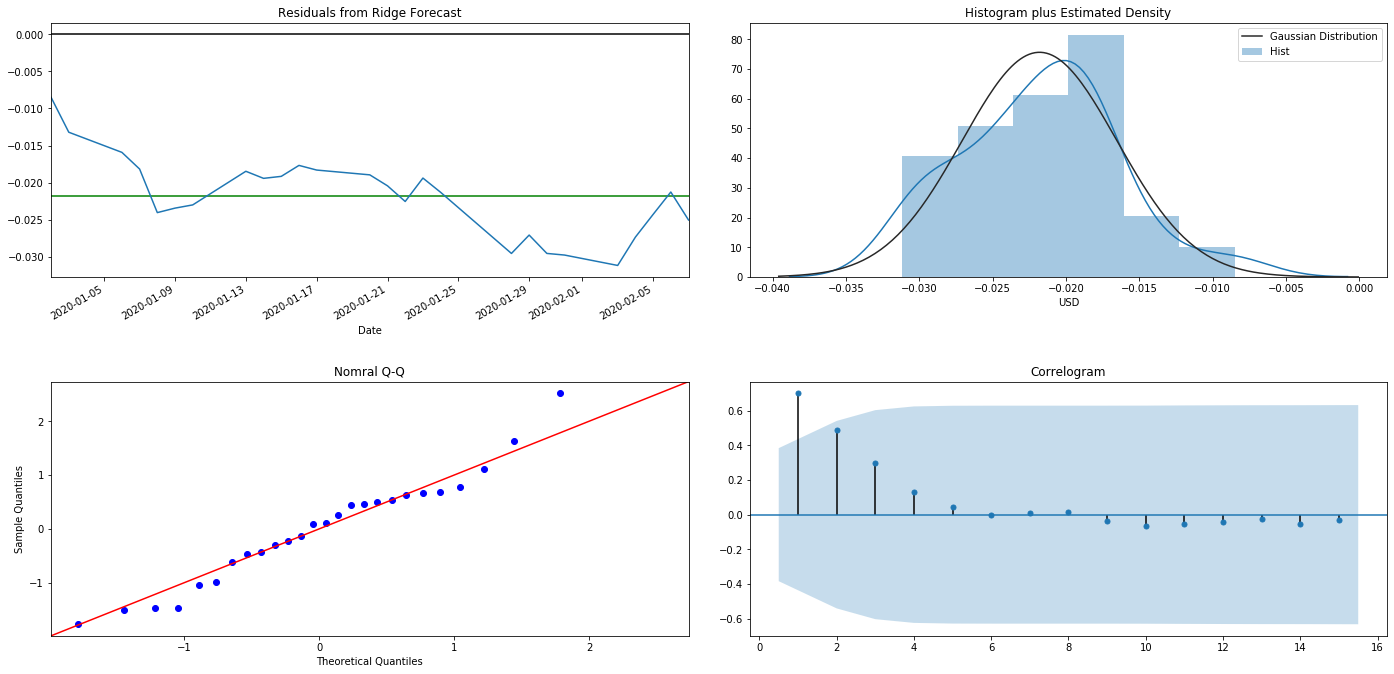

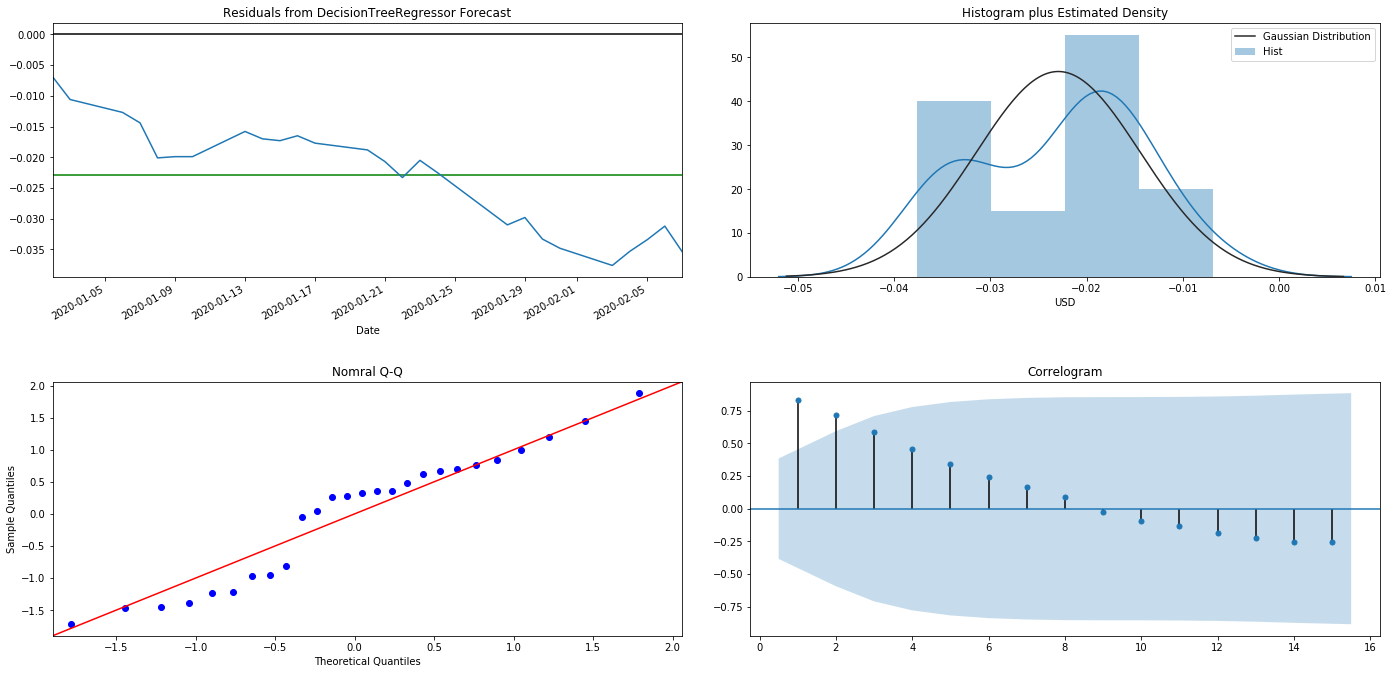

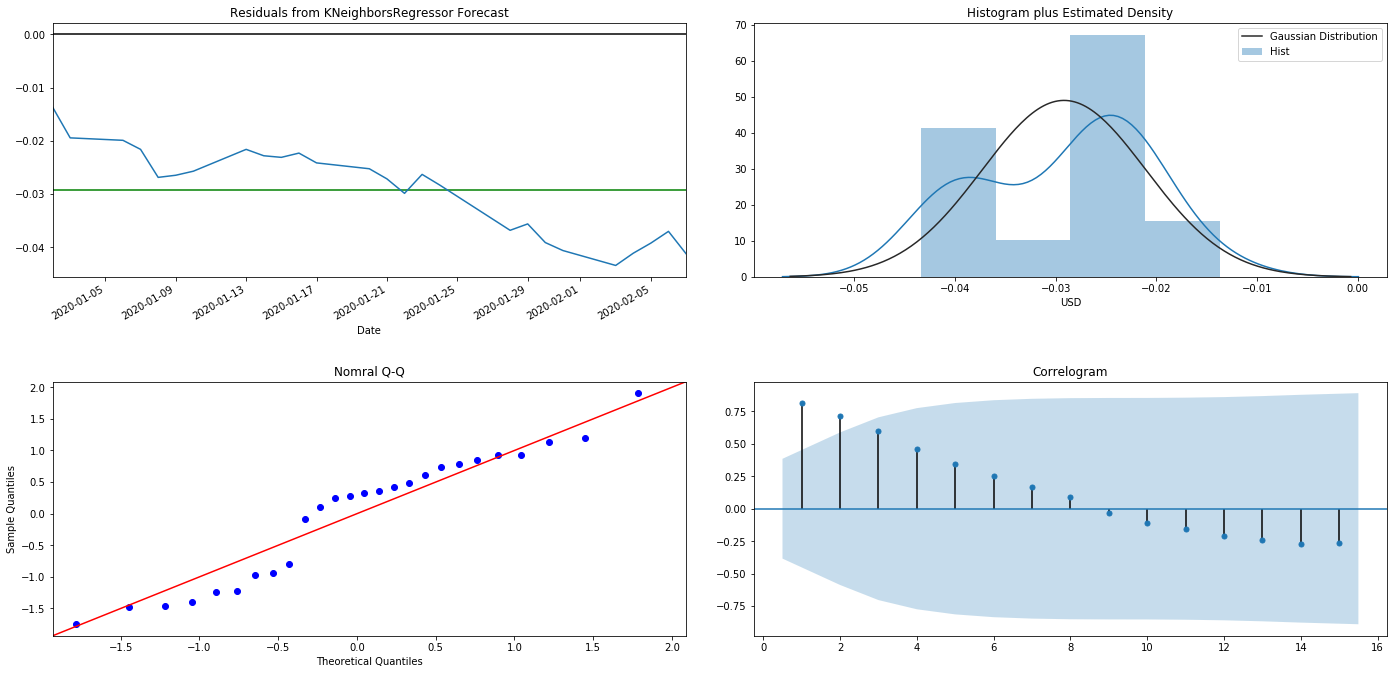

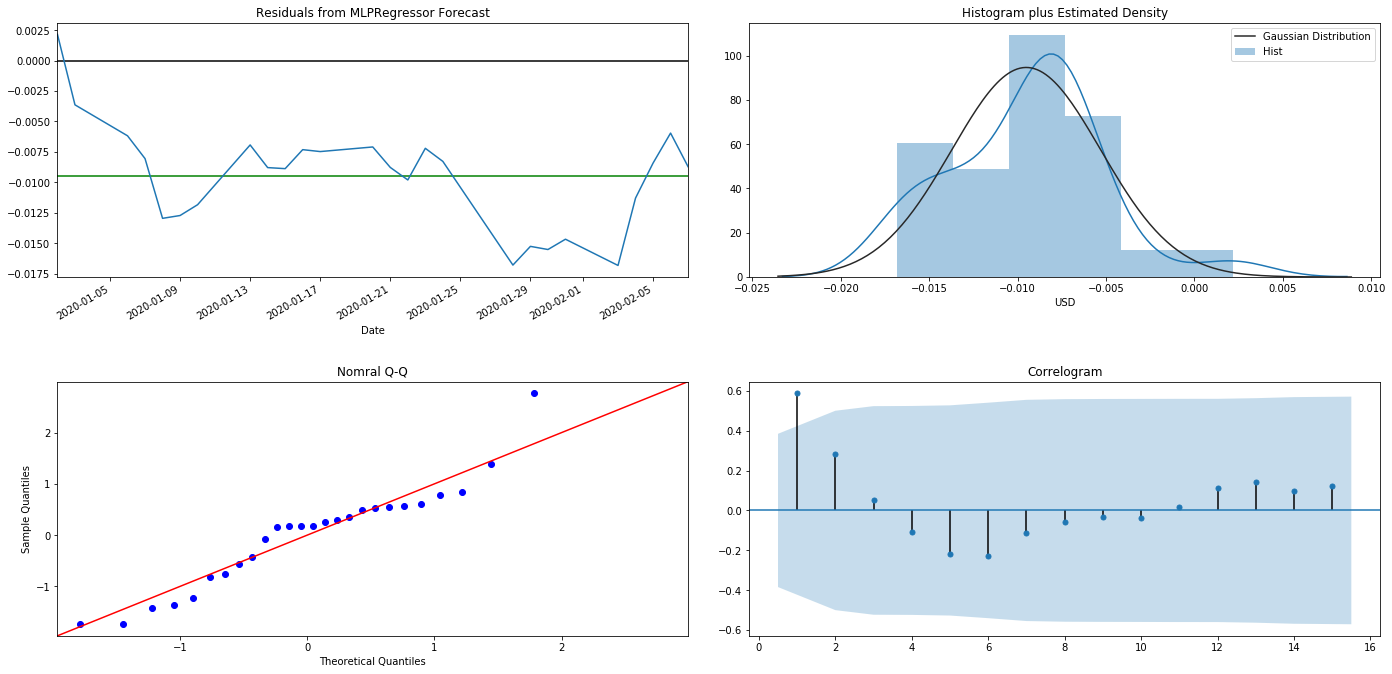

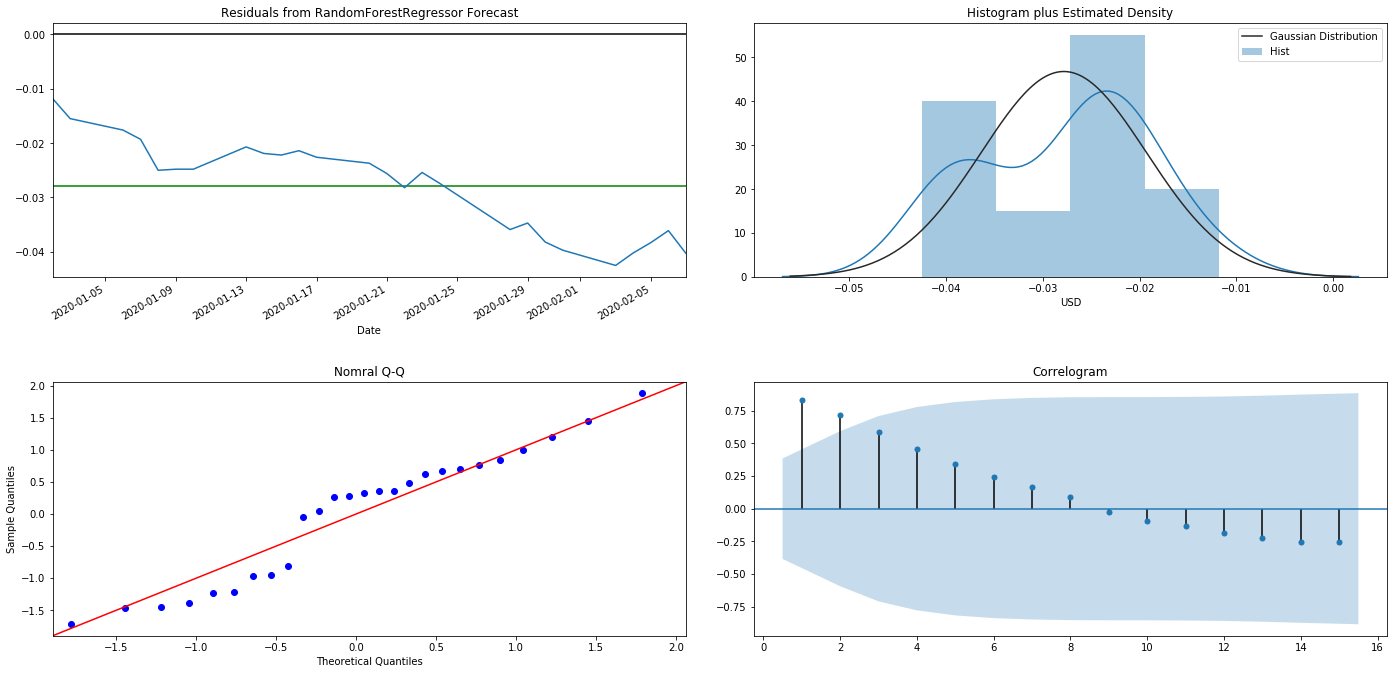

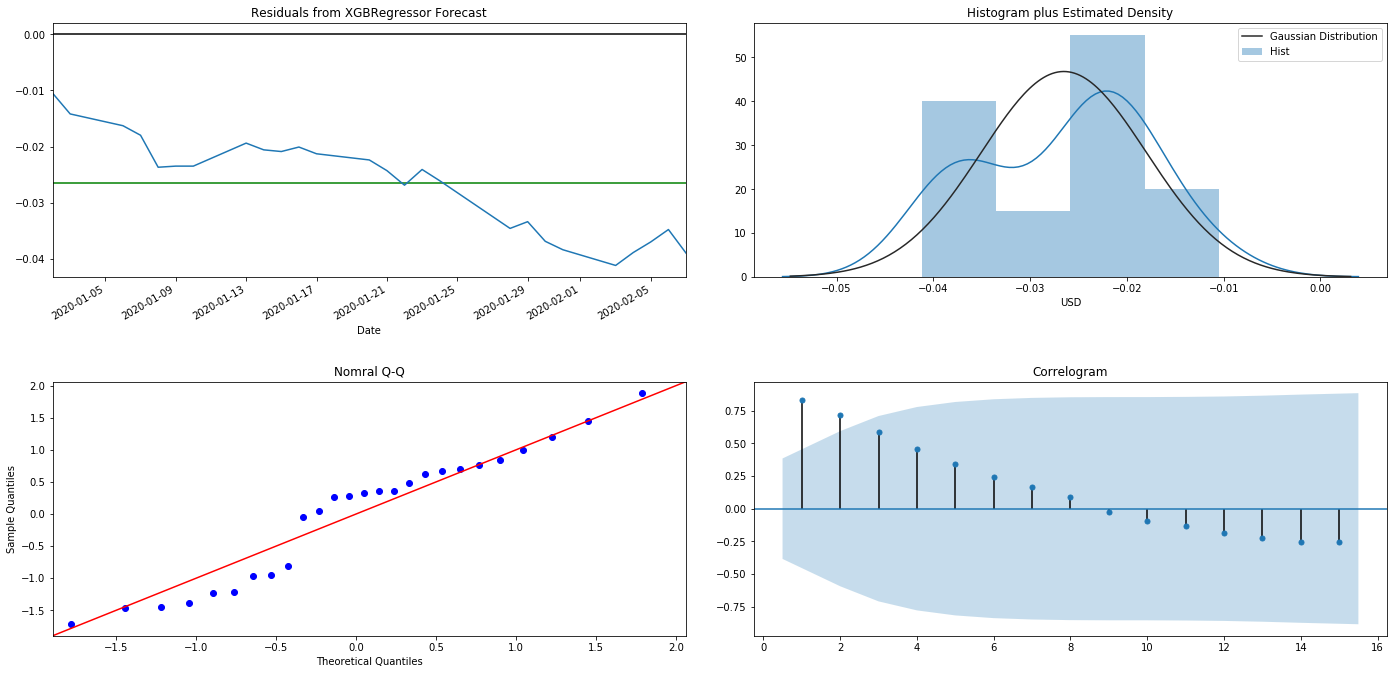

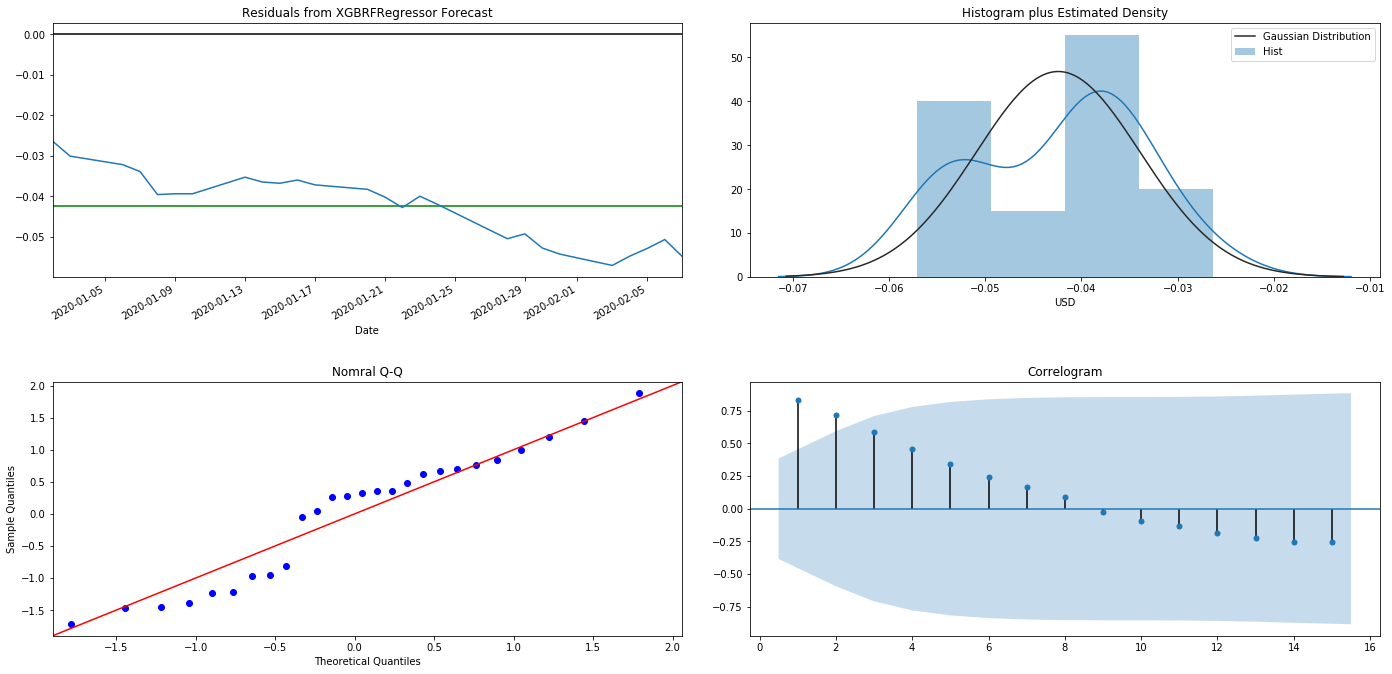

In [26]:
eval_df = evaluate_models(models, labels)

In [27]:
# Last day value as prediction
X_test = test_df.drop('USD', axis=1).astype('float')
y_test = test_df['USD']

preds = y_test.shift().fillna(0.7006)

metrics = [r2_score, mean_absolute_error, mean_squared_error, median_absolute_error]
metric_labels = ['r2_score', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error']

last_value = {}

for metric, label in zip(metrics, metric_labels):
    last_value[label] = metric(y_test, preds)

last_val_metrics = pd.DataFrame(index=['Last Value'], data=last_value)

eval_df = eval_df.append(last_val_metrics).sort_values(by=metric_labels,ascending=False)

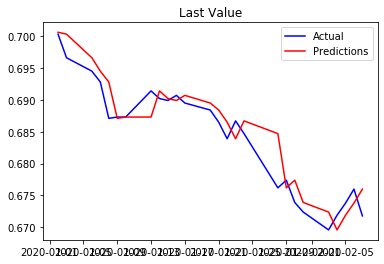

In [28]:
# Plot Last Value Predictions on Test
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_test.index, preds, color='red', label='Predictions')
plt.title("Last Value")
plt.legend()
plt.show()

In [29]:
eval_df

,r2_score,mean_absolute_error,mean_squared_error,median_absolute_error
Last Value,0.881022,0.0023,8.64846e-06,0.00195
LinearRegression,0.86619,0.00241738,9.72654e-06,0.00175315
MLPRegressor,-0.489131,0.00967847,0.000108244,0.0087507
Ridge,-5.92437,0.0218051,0.000503328,0.0212847
DecisionTreeRegressor,-7.23866,0.0229385,0.000598862,0.0203
XGBRegressor,-9.67468,0.0265188,0.000775935,0.0238803
RandomForestRegressor,-10.6599,0.0278363,0.000847549,0.0251978
KNeighborsRegressor,-11.6152,0.0291692,0.000916987,0.02666
XGBRFRegressor,-24.7483,0.0424139,0.00187162,0.0397754
Lasso,-74.3452,0.0735126,0.00547679,0.0708741


In [30]:
def residual_diagnostics(y, y_pred, model_name=""):
    from scipy.stats import norm
    from statsmodels.graphics.gofplots import qqplot
    from statsmodels.graphics.tsaplots import plot_acf

    residuals = y - y_pred

    fig, ax = plt.subplots(2,2, figsize=(20,10))

    # Residual Plot
    residuals.plot(title='Residuals from {}Forecast'.format(model_name+" "), ax=ax[0,0])
    resid_mean = residuals.mean()
    ax[0,0].hlines(resid_mean, '2018','2021', color='green')
    ax[0,0].hlines(0,'2018','2021', color='black', label='Residual Mean')

    # Histogram-KDE plot
    sns.distplot(residuals, fit=norm, ax=ax[0,1])
    ax[0,1].legend(['Gaussian Distribution', 'Hist'])
    ax[0,1].set_title('Histogram plus Estimated Density')

    # Normal Q-Q Plot
    qqplot(residuals, fit=True, line='45', ax=ax[1,0])
    ax[1,0].set_title('Nomral Q-Q')
    # plt.show()

    # Correlogram
    plot_acf(residuals, zero=False, ax=ax[1,1])
    ax[1,1].set_title("Correlogram")
    fig.tight_layout(pad=3)

    fig.show()

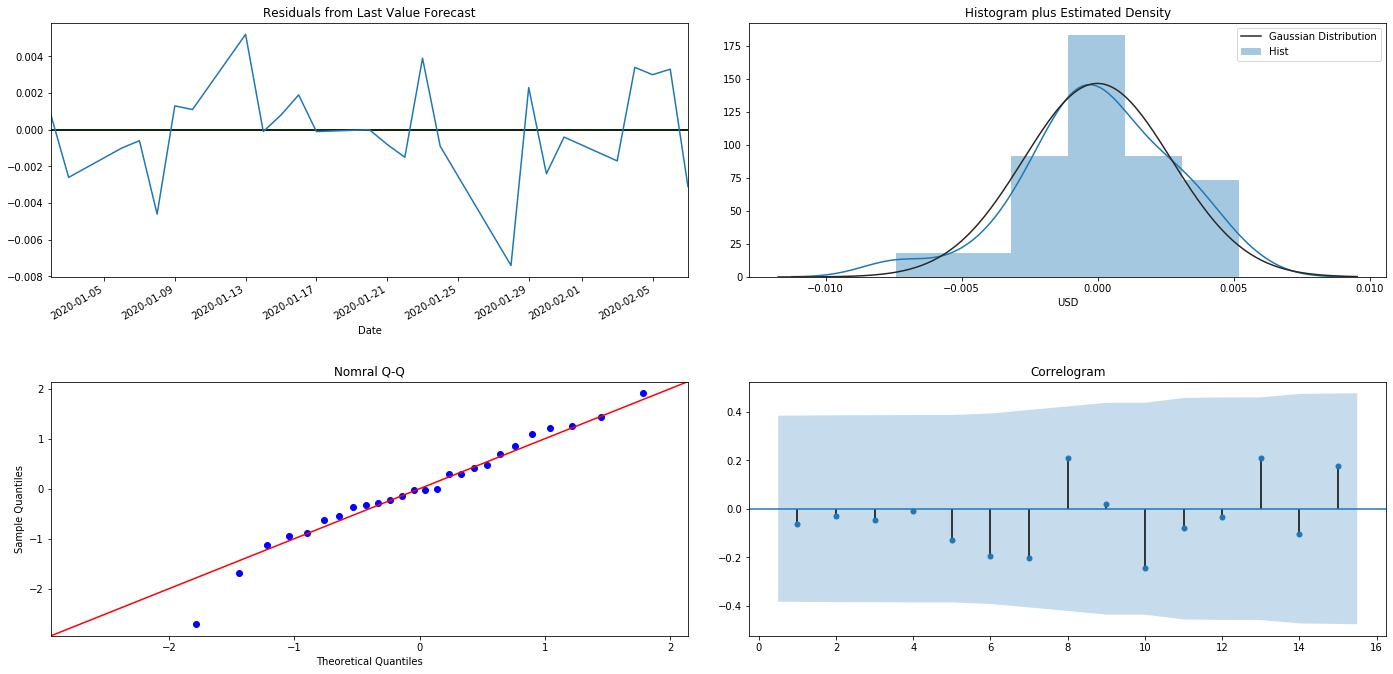

In [31]:
residual_diagnostics(y_test.astype('float'), preds - 0.0011, "Last Value")

In [83]:

def buy_usd(aud_amt, exchange_rate):
    return aud_amt * exchange_rate

def buy_aud(usd_amt, exchange_rate):
    return usd_amt / exchange_rate

def buy_sell_plot(y, y_pred):
    buy_sell_df = pd.DataFrame(zip(y, y_pred), index = y.index, columns=['USD', 'Predictions'])
    
    buy_sell_df['predicted_change'] = buy_sell_df['Predictions'].diff().shift(-1)
    buy_sell_df['buy'] = buy_sell_df['predicted_change'].apply(lambda x: 1 if x >0 else (2 if x==0 else 0))
    buy_sell_df['labels'] = buy_sell_df['buy'].apply(lambda x:"Buy" if x==1 else ("Sell" if x==0 else "Hold"))

    buy_sell_df['USD'].plot()
    scatter = plt.scatter(buy_sell_df.index, buy_sell_df['USD'], c=buy_sell_df.buy)
    legend = plt.legend(*scatter.legend_elements())
    plt.title("Naive Strategy on Test Data (Sell, Buy or Hold)", fontsize=16)
    plt.show()
    
    return buy_sell_df

def backtest(y, y_pred, initial_investment=1000, trade_amount=100):

    bsdf = pd.DataFrame(zip(y, y_pred), index = y.index, columns=['USD', 'Predictions'])
    
    bsdf['predicted_change'] = bsdf['Predictions'].diff().shift(-1)
    bsdf['buy'] = bsdf['predicted_change'].apply(lambda x: 1 if x >0 else (2 if x==0 else 0))

    logs = []
    profits = []

    strategy = bsdf.buy
    wallet = initial_investment
    
    for i in range(len(strategy)-1):
        rate_today = y[i]
        rate_future = y[i+1]
        buy = strategy[i]
#         print(buy)

        trade_money = trade_amount * rate_today
        wallet -= trade_amount

        if buy == 0:
            profit = trade_money - trade_amount * rate_future
        elif buy == 1:
            profit = trade_amount * rate_future - trade_money
        elif buy == 2:
            profit = 0
       
        
        if profit >= 0:
            wallet += trade_amount + profit
        else:
            wallet += trade_amount + profit

        logs.append(wallet)

    net_profit = wallet - initial_investment
    
#     plt.plot(bsdf.index[1:], logs)
#     plt.xticks(rotation=90)
#     plt.legend(["Net Profit = %.2f"%(net_profit)])
#     plt.title("Investment Growth over time")
#     plt.show()

    return net_profit, logs

def random_simulation(simulation_rate, ar_profit_on_same_data, limit=0.3):
    initial_investment = 1000
    trade_amount = 100

    profits = []

    for it in range(5000):

        random_strategy = np.random.randint(2, size=len(simulation_rate))

        wallet = initial_investment
        logs = []

        for i in range(len(random_strategy)-1):
            rate_today = simulation_rate[i]
            rate_future = simulation_rate[i+1]
            buy = random_strategy[i]

            trade_money = trade_amount * rate_today
            wallet -= trade_amount

            if buy == 0:
                profit = trade_money - trade_amount * rate_future
            elif buy == 1:
                profit = trade_amount * rate_future - trade_money
            elif buy == 2:
                profit = 0


            if profit >= 0:
                wallet += trade_amount + profit
            else:
                wallet += trade_amount + profit

            logs.append(wallet)

        net_profit = wallet - initial_investment

        profits.append(net_profit)
        
    profit_label = "Profit = %0.2f"%ar_profit_on_same_data
    sns.distplot(profits)
    plt.vlines(ar_profit_on_same_data, 0, limit, label='Profit with ARIMA Forecast')
    plt.legend([profit_label])
    plt.show()
    
def predict(train_data, n_steps):
    model = ARIMA(train_data, (4,1,4))
    model_fit = model.fit()

    predictions = model_fit.forecast(n_steps)[0]

    return predictions

def profit_dataframe(train_ts=train_df['USD'], val_ts = val_df['USD'].head()):
    import itertools

    profit_on_validation5 = pd.DataFrame(columns=['p','d','q','Profit'])

    p = d = q = range(1,5)

    pdq = list(itertools.product(p,d,q))

    for params in pdq:

        try:

            model = ARIMA(train_ts, params)
            model_fit = model.fit()

            y = val_ts['USD']
            
            y_pred = model_fit.forecast(len(val_ts))[0]

            model_net_profit, investment_growth = backtest(y, y_pred)

            profit_on_validation5 = profit_on_validation5.append({'p': params[0],
                                                                  'd': params[1], 
                                                                  'q': params[2], 
                                                                  'Profit': model_net_profit}, ignore_index=True)

        except:
            continue

    profit_on_validation5 = profit_on_validation5.sort_values(by='Profit', ascending=False)  
    
    return profit_on_validation5.head(15)

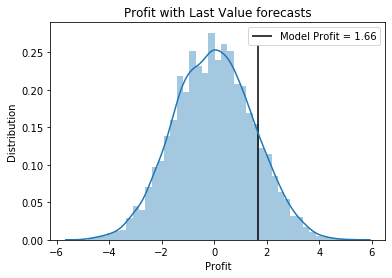

In [71]:
val_ts = val_df['USD']
test_ts = test_df['USD']

lv_test_preds = test_ts.shift().fillna(0.7006)

lv_profit, lv_equity = backtest(test_ts, lv_test_preds)
random_simulation(test_ts, lv_profit, 0.26, "Last Value")

In [89]:
def random_simulation(simulation_rate, ar_profit_on_same_data, limit=0.3, model_name=""):
    initial_investment = 1000
    trade_amount = 100

    profits = []

    for it in range(5000):

        random_strategy = np.random.randint(2, size=len(simulation_rate))

        wallet = initial_investment
        logs = []

        for i in range(len(random_strategy)-1):
            rate_today = simulation_rate[i]
            rate_future = simulation_rate[i+1]
            buy = random_strategy[i]

            trade_money = trade_amount * rate_today
            wallet -= trade_amount

            if buy == 0:
                profit = trade_money - trade_amount * rate_future
            elif buy == 1:
                profit = trade_amount * rate_future - trade_money
            elif buy == 2:
                profit = 0


            if profit >= 0:
                wallet += trade_amount + profit
            else:
                wallet += trade_amount + profit

            logs.append(wallet)

        net_profit = wallet - initial_investment

        profits.append(net_profit)
        
    title = "Profit with {} forecasts".format(model_name)        
    profit_label = "Model Profit = %0.2f"%ar_profit_on_same_data
    sns.distplot(profits)
    plt.vlines(ar_profit_on_same_data, 0, limit, label='Profit with ARIMA Forecast')
    plt.xlabel("Profit")
    plt.ylabel("Distribution")
    plt.title(title)
    plt.legend([profit_label])
    plt.show()


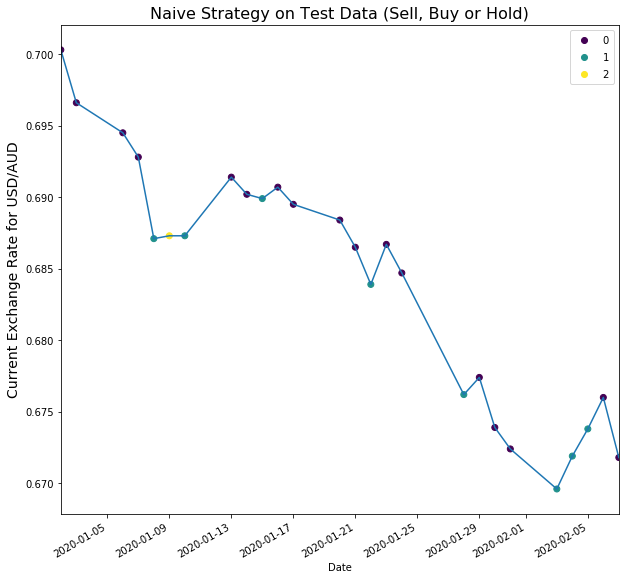

In [84]:
plt.figure(figsize=(10,10))
plt.ylabel("Current Exchange Rate for USD/AUD", fontsize=14)
_ = buy_sell_plot(test_ts, test_ts)

In [85]:
bestbacktest(test_ts, test_ts)

(5.949999999999818,
 [1000.37,
  1000.58,
  1000.75,
  1001.3199999999999,
  1001.3399999999999,
  1001.3399999999999,
  1001.7499999999999,
  1001.8699999999999,
  1001.8999999999999,
  1001.9799999999999,
  1002.0999999999999,
  1002.2099999999999,
  1002.3999999999999,
  1002.6599999999999,
  1002.9399999999998,
  1003.1399999999999,
  1003.9899999999999,
  1004.1099999999999,
  1004.4599999999999,
  1004.6099999999999,
  1004.8899999999999,
  1005.1199999999999,
  1005.3099999999998,
  1005.5299999999999,
  1005.9499999999998])

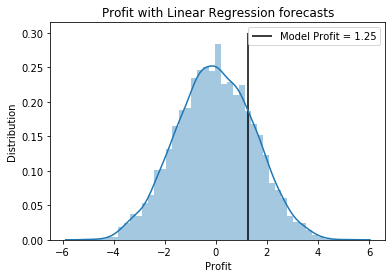

In [94]:
lr_profit, lr_equity = backtest(test_ts, test_pred)
random_simulation(test_ts, lr_profit, model_name="Linear Regression")